In [ ]:
# Activate R magic:
%load_ext rpy2.ipython

# 1.Introducción

Las ventas online en Chile aumentaron 119% en la última semana de marzo de 2021, cuando comenzaron las cuarentenas en el país, [según la Cámara de Comercio de Santiago](https://forbescentroamerica.com/2020/04/23/el-efecto-de-covid-19-en-el-ecommerce/).

 Esto implicó un cambio en la estrategia de negocios de múltiples empresas a nivel nacional. Dada la imposibilidad de ir presencialmente a una tienda, gran cantidad de empresas a nivel nacional tuvieron que dejar de lado la clásica tienda comercial y se vieron obligados a potenciar su canal de ventas e-commerce.

 De esta forma, se busca entregar información personalizada a los clientes, vía e-mail, basado en los productos que este ha adquirido anteriormente. Con esto, también se busca tener más información sobre los clientes para futuros proyectos.

**Blockstore** es una cadena de tiendas, ubicada en Chile, enfocada la venta de zapatillas, accesorios y vestuario de las mejores marcas urbanas.
Dada la contingencia mundial de la pandemia y el estallido social del 2019, Block tuvo que adaptarse al canal de ventas online por lo que la necesidad de la aplicación de análisis de datos y en particular de minería de datos va en el contexto cambiante en el ámbito nacional, donde la crisis social, pandemia, mayor dinero circulante y un aumento explosivo en ventas online hacen necesario tener las mejores estrategias diferenciadas para cada cliente.

Es por esto que decidimos estudiar el comportamiento de compra de los clientes a nivel nacional.
Nos parece interesante estudiar estos datos para generar más ventas enfocando una estrategia de negocios diferenciada para cada grupo de clientes en específico de acuerdo a sus gustos.


# 2.Exploración de Datos

In [ ]:
# Asignamos nuestro "working directory" (set w. d.) como el directorio ~/RDATA y ponemos librerías
%%R
library(ggplot2)
library(dplyr)
library(tidyverse)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**Cargamos los datos originales**
Sin embargo, estos datos no están limpios debido a que los clientes no ingresaron bien los datos, por lo que se realizó una limpieza de los datos para poder trabajar de mejor manera.

In [ ]:
# (No volver a ejecutar pls)
%%R
pedidos_preeliminar <- read_csv("/content/orders.csv")
pedidos_detalle_preeliminar <-read_csv("/content/order_detail.csv")

A modo de resumen se dejan la cantidad de columnas y filas de cada dataset

In [ ]:
%%R
print(nrow(pedidos_preeliminar))
print(ncol(pedidos_preeliminar))
print(nrow(pedidos_detalle_preeliminar))
print(ncol(pedidos_detalle_preeliminar))

[1] 104955
[1] 68
[1] 126704
[1] 9


Para la limpieza se eliminaron filas vacías, datos *dummy* realizados por la empresa, y otros valores incosistentes y repetitivos.
También se hizo un refactoring de los nombres de las columnas para un mejor entendimiento del dataset.

In [ ]:
%%R
pedidos<-read.csv("/content/Orders_OFICIAL.csv", encoding = "UTF-8", sep=";")
pedidos_detalle <-read.csv("/content/ORDER_DETAIL_OFICIAL.csv", encoding = "UTF-8",sep=";")
pedidos$count <- as.numeric(ave(pedidos$Comuna, pedidos$Comuna, FUN = length))
pedidos_detalle$count.marca <- as.numeric(ave(pedidos_detalle$Marca, pedidos_detalle$Marca, FUN = length))

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
# Se cambia el formato de la columna Fecha.Compra a Date.
pedidos$Fecha.Compra <- as.Date(pedidos$Fecha.Compra, format ="%d-%m-%Y")
# Se cambia el formato de la columna Fecha.Pedido a Date. También se agrega una columna con el año.
pedidos_detalle$Fecha.Pedido <- as.Date(pedidos_detalle$Fecha.Pedido, format ="%Y-%m-%d")
pedidos_detalle$anio <- as.numeric(format(pedidos_detalle$Fecha.Pedido,'%Y'))

# 2.1. Estudio sobre los datos filtrados

1. **A grandes razgos podemos calcular la cantidad promedio que se gasta una persona en Block:**

In [ ]:
%%R
nfilas <- nrow(pedidos)
total_vendido <- sum(pedidos$Precio.Pedido)
promedio_pedidos <- total_vendido/nfilas
(promedio_pedidos)

[1] 45364.45


2. **Vamos a ver primero la cantidad de gente que pide más y menos que el promedio:**


In [ ]:
%%R
#La gente que pide mas que el promedio
pedidos_RM_mayorpromedio <- data.frame(pedidos[pedidos$REGION.CON.CODIGO == "RM" & pedidos$Precio.Pedido > promedio_pedidos,] ) 
print(nrow(pedidos_RM_mayorpromedio))
#La gente que pide menos que el promedio
pedidos_RM_menorpromedio <- data.frame(pedidos[pedidos$REGION.CON.CODIGO == "RM" & pedidos$Precio.Pedido <= promedio_pedidos,] ) 
print(nrow(pedidos_RM_menorpromedio))

[1] 36083
[1] 45759


3. **El pedido más caro en Block online**
Podemos ver que en la tabla pedidos_Detalles según el numero de pedido podemos ver el detalle de la compra que realizó la clienta.

In [ ]:
%%R
pedidos[which.max(pedidos$Precio.Pedido),]


           ID                    Email Precio.Pedido Numero.Pedido   ID.Cliente
3488 1,72E+12 alfredo.e.vega@gmail.com        454116       #BL4499 1.939678e+12
     Fecha.Compra Año.Compra Mes.Compra Cantidad.Pedidos.Cliente
3488   2019-07-25       2019          7                       17
     Total.Gastado.Cliente       RUT           Direccion.1 Direccion.2 Comuna
3488               1050781 18172868k Caupolican 1620 renca         210  RENCA
     Nombre.Cliente REGION.CON.CODIGO Tipo.despacho count
3488 Camila Fuentes                RM      Despacho  1337


In [ ]:
%%R
#usamos su numero de pedido para ver las compras realizadas
pedido_maximo_detalle <- pedidos_detalle[pedidos_detalle$Numero.Pedido == "#BL4499",]
#verificamos el dinero sea consistente en ambas tablas
sum(pedido_maximo_detalle$Precio.Total.Productos)

[1] 454116


4. **La cantidad de pedidos divididos por región:**

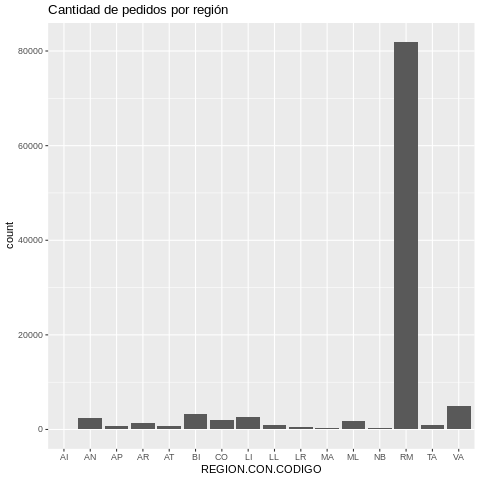

In [ ]:
%%R
ggplot(pedidos, aes(x = REGION.CON.CODIGO),) +
   ggtitle("Cantidad de pedidos por región") +
  geom_bar()

5. **Cantidad de pedidos dividos por comuna**

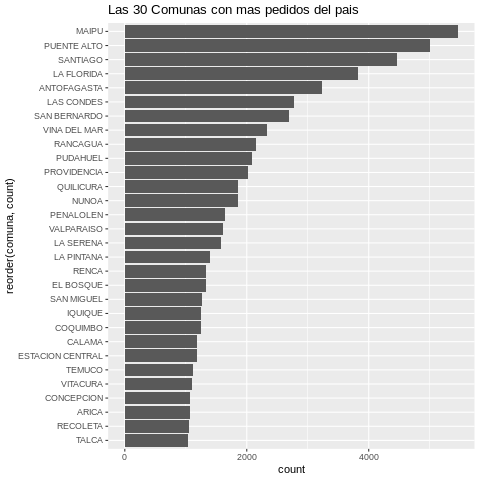

In [ ]:
%%R
freq_comuna <- data.frame(comuna = pedidos$Comuna, count = pedidos$count)
freq_comuna <-  unique(freq_comuna)
freq_comuna <- freq_comuna[order(freq_comuna[,"count"], decreasing = TRUE),]
ggplot(freq_comuna[1:30,], aes(x = reorder(comuna , count),y = count)) + ggtitle("Las 30 Comunas con mas pedidos del pais") + coord_flip() + geom_bar(stat = "identity")

6. Puente alto y Las condes son de las comunas más pobladas de la RM
Puente alto es una de las comunas más "zapatilleras" vs "Las condes" que es una comuna que tiende más a la ropa formal. A continuación veremos la cantidad de pedidos, el promedio de estos y la suma total de dinero de las respectivas comunas:

In [ ]:
%%R
pedidos_comuna_Lascondes <- data.frame(pedidos[pedidos$Comuna == "LAS CONDES", ] )
print(nrow(pedidos_comuna_Lascondes))
print(mean(pedidos_comuna_Lascondes$Precio.Pedido))
print(sum(pedidos_comuna_Lascondes$Precio.Pedido))

pedidos_comuna_maipu <- data.frame(pedidos[pedidos$Comuna == "MAIPU", ] )
print(nrow(pedidos_comuna_maipu))
print(mean(pedidos_comuna_maipu$Precio.Pedido))
print(sum(pedidos_comuna_maipu$Precio.Pedido))

[1] 2777
[1] 47841.46
[1] 132855726
[1] 5462
[1] 42816.93
[1] 233866080


7. **Se deja un historial de pedidos desde el inicio del dataset hasta la ultima fecha presente:**

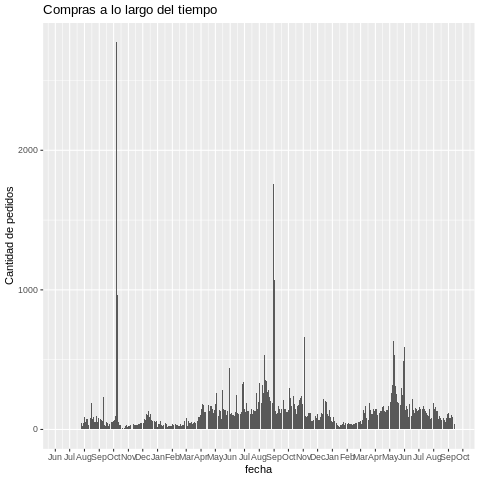

In [ ]:
%%R
ggplot(pedidos, aes(x = Fecha.Compra) ) + geom_bar() + scale_x_date(date_breaks = "1 month", date_labels = "%b") + labs(title = "Compras a lo largo del tiempo", x = "fecha", y = "Cantidad de pedidos")

8. **Vamos a ver cuanto se ha vendido en block por marca**

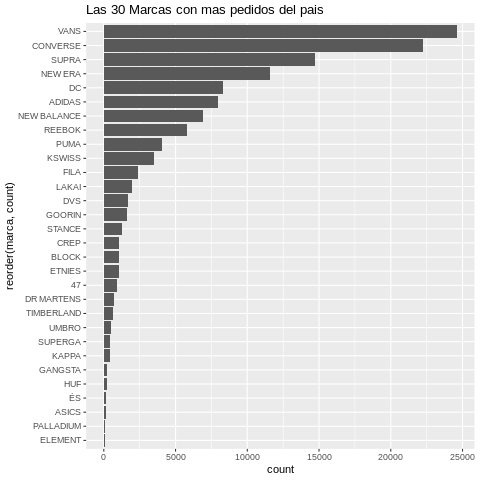

In [ ]:
%%R
freq_marca <- data.frame(marca = pedidos_detalle$Marca, count = pedidos_detalle$count.marca)
freq_marca <-  unique(freq_marca)
freq_marca <- freq_marca[order(freq_marca[,"count"], decreasing = TRUE),]

ggplot(freq_marca[1:30,], aes(x = reorder(marca , count), y = count)) + ggtitle("Las 30 Marcas con mas pedidos del pais") + coord_flip() + geom_bar(stat = "identity")

9. **Veremos cuanto se ha vendido en block por marca:**

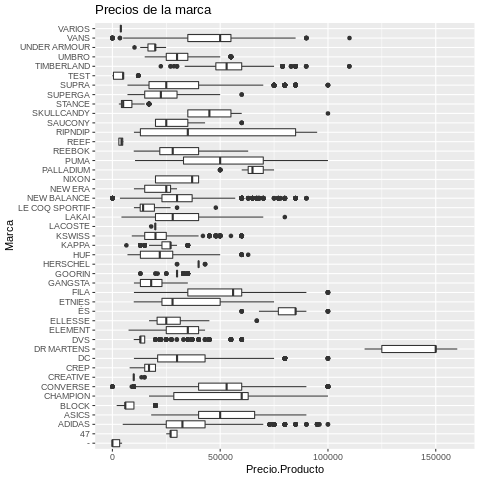

In [ ]:
%%R
precio_marca <- data.frame(marca = pedidos_detalle$Marca, precio = pedidos_detalle$Precio.Producto)

p1 <- ggplot(pedidos_detalle, aes(x = Marca, y = Precio.Producto)) + geom_boxplot()+ coord_flip() + ggtitle("Precios de la marca")
p1

# Hito 2

Para este hito se trabajará con la librería *pandas* en *Python*, por lo que se debe reimportar las bases de datos y también limpiarlas para reordenar las ideas que serán llevadas a cabo en este *Hito 2*.

Se importan las librerías necesarias para la exploración:

In [1]:
# Librerias principales para la exploración:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Luego de esto, borramos las columnas de la dirección y el rut para proteger la privacidad de cada uno de los compradores, además que tenemos un ID de cliente que identifica a cada persona única, similar al *RUT*.

In [3]:
# Reimportamos todo
pedidos2 = pd.read_csv("Orders_OFICIAL.csv", sep=";")
pedidos_detalles2 = pd.read_csv("ORDER_DETAIL_OFICIAL.csv", sep=";")

pedidos2 = pedidos2.drop(columns="Direccion 1")
pedidos2 = pedidos2.drop(columns="Direccion 2")
pedidos2 = pedidos2.drop(columns="RUT")
pedidos2 = pedidos2.drop(columns="Email")
pedidos2.head()

,ID,Precio Pedido,Numero Pedido,ID Cliente,Fecha Compra,Año Compra,Mes Compra,Cantidad Pedidos Cliente,Total Gastado Cliente,Comuna,Nombre Cliente,REGION CON CODIGO,Tipo despacho
0,"1,15E+12",21900,#1010,1.899446e+12,08-07-2019,2019,7,13.0,444337.0,COLINA,DENNISSE ALVARADO CHIGUAY,RM,Despacho
1,"1,15E+12",37419,#1011,1.938644e+12,25-07-2019,2019,7,1.0,37419.0,307,Florencia Garcia,RM,Despacho
2,"1,15E+12",40419,#1012,1.938654e+12,25-07-2019,2019,7,1.0,40419.0,301,Belén Herrera,RM,Despacho
3,"1,15E+12",12329,#1013,1.939397e+12,25-07-2019,2019,7,1.0,12329.0,316,Jason Lizana,RM,Despacho
4,"1,15E+12",20993,#1014,1.906865e+12,10-07-2019,2019,7,14.0,656793.0,LO BARNECHEA,Tomas Schnapp,RM,Retiro en tienda


# ¿Cómo se relaciona el precio de la compra con el lugar desde donde se pidió?


In [4]:

# Comunas

comunas = pedidos2['Comuna'].unique()
# print(comunas) -> Algunas son numeros

promedios = []
for comuna in comunas:
  promedios.append(pedidos2[pedidos2['Comuna'] == comuna]['Precio Pedido'].mean())

# Promedio de precios de pedido por comuna
print(pedidos2[pedidos2['Comuna'] == 'CHONCHI']['Precio Pedido'].mean(), len(pedidos2[pedidos2['Comuna'] == 'CHONCHI']['Precio Pedido']))
print(pedidos2[pedidos2['Comuna'] == 'SANTIAGO']['Precio Pedido'].mean(), len(pedidos2[pedidos2['Comuna'] == 'SANTIAGO']['Precio Pedido']))
print(pedidos2[pedidos2['Comuna'] == 'VITACURA']['Precio Pedido'].mean(), len(pedidos2[pedidos2['Comuna'] == 'VITACURA']['Precio Pedido']))
print(pedidos2[pedidos2['Comuna'] == 'IQUIQUE']['Precio Pedido'].mean(), len(pedidos2[pedidos2['Comuna'] == 'IQUIQUE']['Precio Pedido']))

zip_iterator = zip(comunas, promedios)
diccionario = dict(zip_iterator)

#print(diccionario)

#LL y RM
pedidos2[pedidos2['Comuna'] == 'CHONCHI']

70290.14285714286 7
41775.52635119982 4459
45061.81488203267 1102
49104.514011208965 1249


,ID,Precio Pedido,Numero Pedido,ID Cliente,Fecha Compra,Año Compra,Mes Compra,Cantidad Pedidos Cliente,Total Gastado Cliente,Comuna,Nombre Cliente,REGION CON CODIGO,Tipo despacho
13945,"2,13E+12",135960,BL14959,3.020355e+12,31-03-2020,2020,3,2.0,261930.0,CHONCHI,MILENA ALVAREZ,LL,Despacho
27559,"2,44E+12",16980,BL28579,3.342724e+12,11-07-2020,2020,7,1.0,16980.0,CHONCHI,Matías Torres Salas,LL,Despacho
31795,"2,50E+12",61980,BL32816,3.416197e+12,05-08-2020,2020,8,1.0,61980.0,CHONCHI,Lizbeth Bravo Martínez,RM,Despacho
44347,"2,62E+12",42980,BL45374,3.529628e+12,17-09-2020,2020,9,1.0,42980.0,CHONCHI,Mirtha Saldivia,RM,Despacho
54481,"2,73E+12",35181,BL55509,3.628113e+12,31-10-2020,2020,10,1.0,35181.0,CHONCHI,javiera díaz Cisternas,LL,Despacho
100427,"3,85E+12",72980,BL101467,5.130756e+12,18-05-2021,2021,5,1.0,72980.0,CHONCHI,Nicol Andrade igor,LL,Despacho
102028,"3,86E+12",125970,BL103068,3.020355e+12,31-03-2020,2020,3,2.0,261930.0,CHONCHI,MILENA ALVAREZ,LL,Despacho


# ¿Qué marcas se compran más según el sector? 

# Preguntas y problemas

Dada la exploración anterior y su motivación original, formular preguntas que se pueden responder mediante la minería de datos y que se puedan vincular a la problemática planteada en la motivación


1. **¿Qué marcas se compran juntos?**
2. **¿Existe una tendencia en la segunda compra con respecto a la primera?(se compra la misma marca 2 veces?)**
3. **¿Qué producto puede que compre alguien que ya adquirió x producto?** 
4. **Comportamiento de clientes con respecto a la cantidad de compras y su monto total** 






# Pregunta 1
Para responder a esta pregunta se realizarán los siguientes pasos:
- Utilizaremos Reglas de Asociación, basándose en el problema de la canasta.
- No se ha visto en clases, por lo que no tenemos definido los pasos a seguir.

# Pregunta 2 
Al ser una especie de "recomendación", utilizaremos clasificacion pues lo importante en esta pregunta es ver cuál es la tendencia de compra una vez que se haya realizado la primera. Para esta, tendremos que generar una nueva columna con el tipo de producto (por ejemplo: polera, zapatillas, jockey, etc.), y utlizar esto para predecir qué tipo de producto se hará en la segunda compra de un cliente. La idea es básicamente, pasarle la tabla al entrenador, pero sólo con los datos de la primera compra, y ver si es capaz de predecir la siguiente.

# Pregunta 3
- De forma análoga a la pregunta 1 Utilizaremos Reglas de Asociación, basándose en el problema de la canasta.
- No se ha visto en clases, por lo que no tenemos definido los pasos a seguir.


# Pregunta 4


#Resultado preliminar

##Pregunta 4

In [5]:
# crear tabla a partir de la otra
pedidos3 = pedidos2[['ID Cliente', 'Cantidad Pedidos Cliente', 'Total Gastado Cliente']].copy()
print(pedidos3.size)
pedidos3 = pedidos3.drop_duplicates(subset = ['ID Cliente'])
print(pedidos3.size)
pedidos3 = pedidos3.drop(['ID Cliente'], axis=1)
pedidos3.head()

314760
256215


,Cantidad Pedidos Cliente,Total Gastado Cliente
0,13.0,444337.0
1,1.0,37419.0
2,1.0,40419.0
3,1.0,12329.0
4,14.0,656793.0


In [6]:
#K-means

from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

random_state = 20
X = pd.DataFrame(pedidos3).to_numpy()
X


array([[1.30000e+01, 4.44337e+05],
       [1.00000e+00, 3.74190e+04],
       [1.00000e+00, 4.04190e+04],
       ...,
       [1.00000e+00, 5.49800e+04],
       [1.00000e+00, 5.39800e+04],
       [1.00000e+00, 5.99800e+04]])

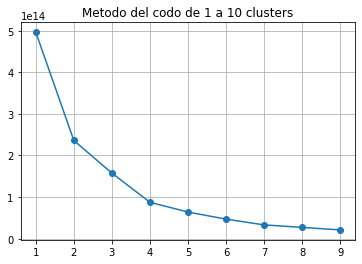

In [5]:
# Respuesta
sse = []

clusters = list(range(1, 10))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

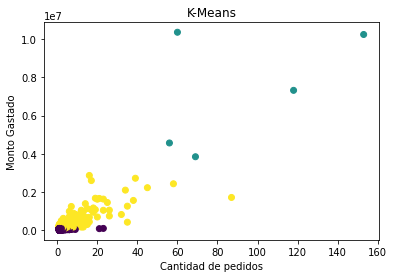

In [7]:
kmeans3 = KMeans(n_clusters=3, random_state=100).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans3.labels_)
plt.title("K-Means")
plt.ylabel("Monto Gastado")
plt.xlabel("Cantidad de pedidos")
plt.show()

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

In [ ]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

In [ ]:
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

In [ ]:
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

In [ ]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

In [ ]:
single_all = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=0).fit(X)
print(single_all.n_clusters_)

In [ ]:
single_6 = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
print(single_6.n_clusters_)

In [ ]:
# Respuesta SINGLE
plt.scatter(new_X[:, 0], new_X[:, 1], c=single_6.labels_)
plt.title("Hierarchical: single, 6 clusters")
plt.show()

In [ ]:
# Respuesta WARD
plt.scatter(new_X[:, 0], new_X[:, 1], c=ward_5.labels_)
plt.title("Hierarchical: ward, 5 clusters")
plt.show()

# Contribuciones

**María Hernández:** Encargada de encontrar el dataset.

**Lung Pang:** Encargado de hacer el repositorio de GitHub y gráficos.

**Cristóbal Saldías** Encargado del informe y su organización.

**Víctor Vidal** Encargado de hacer la presentación.

In [ ]:
pedidos2.head()

,ID,Precio Pedido,Numero Pedido,ID Cliente,Fecha Compra,Año Compra,Mes Compra,Cantidad Pedidos Cliente,Total Gastado Cliente,Comuna,Nombre Cliente,REGION CON CODIGO,Tipo despacho
0,"1,15E+12",21900,#1010,1.899446e+12,08-07-2019,2019,7,13.0,444337.0,COLINA,DENNISSE ALVARADO CHIGUAY,RM,Despacho
1,"1,15E+12",37419,#1011,1.938644e+12,25-07-2019,2019,7,1.0,37419.0,307,Florencia Garcia,RM,Despacho
2,"1,15E+12",40419,#1012,1.938654e+12,25-07-2019,2019,7,1.0,40419.0,301,Belén Herrera,RM,Despacho
3,"1,15E+12",12329,#1013,1.939397e+12,25-07-2019,2019,7,1.0,12329.0,316,Jason Lizana,RM,Despacho
4,"1,15E+12",20993,#1014,1.906865e+12,10-07-2019,2019,7,14.0,656793.0,LO BARNECHEA,Tomas Schnapp,RM,Retiro en tienda


In [ ]:
pedidos2.sort_values(by=['ID Cliente'])

,ID,Precio Pedido,Numero Pedido,ID Cliente,Fecha Compra,Año Compra,Mes Compra,Cantidad Pedidos Cliente,Total Gastado Cliente,Comuna,Nombre Cliente,REGION CON CODIGO,Tipo despacho
102573,"3,87E+12",37983,BL103613,1.849671e+12,17-06-2019,2019,6,87.0,1705606.0,VITACURA,Mario Lorca,RM,Despacho
66402,"2,89E+12",13383,BL67435,1.849671e+12,17-06-2019,2019,6,87.0,1705606.0,VITACURA,Mario Lorca,RM,Despacho
12123,"2,06E+12",7693,BL13137,1.849671e+12,17-06-2019,2019,6,87.0,1705606.0,VITACURA,Mario Lorca,RM,Retiro en tienda
12093,"2,06E+12",7693,BL13107,1.849671e+12,17-06-2019,2019,6,87.0,1705606.0,VITACURA,Mario Lorca,RM,Retiro en tienda
65398,"2,87E+12",17655,BL66431,1.849671e+12,17-06-2019,2019,6,87.0,1705606.0,VITACURA,Mario Lorca,RM,Despacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104912,"3,89E+12",36980,BL105952,5.263262e+12,14-09-2021,2021,9,1.0,36980.0,ANGOL,Gustavo Espinoza,AR,Despacho
104913,"3,89E+12",50980,BL105953,5.263263e+12,14-09-2021,2021,9,1.0,50980.0,QUILLOTA,Katherine Luna,VA,Despacho
104914,"3,89E+12",82980,BL105954,5.263266e+12,14-09-2021,2021,9,1.0,82980.0,VALPARAISO,Maximiliano Letelier,VA,Despacho
104916,"3,89E+12",58980,BL105956,5.263288e+12,14-09-2021,2021,9,1.0,58980.0,ANTOFAGASTA,Daniella Mackay,AN,Despacho


In [ ]:
pedidos_detalles2.head()

,id,Numero Pedido,Fecha Pedido,Nombre Producto,SKU,Cantidad,Precio Producto,Precio Total Productos,Marca
0,"1,12E+12",#1002,2019-07-04,Beanie Adidas Trefoil Accesorios - No Color / ...,DV2486-OSFM,1,17990,17990,ADIDAS
1,"1,12E+12",#1003,2019-07-04,Jockey Dc Cap Star 2 Hombre - Verde / L-XL,55300096GRA0-LXL,2,17990,35980,DC
2,"1,12E+12",#1003,2019-07-04,Zapatilla Adidas 3Mc Hombre - BURDEO / 8,DB3092-080,1,34990,34990,ADIDAS
3,"1,12E+12",#1004,2019-07-05,Zapatilla Adidas Swift Run Hombre Negro Cq2114...,CQ2114-105,1,35990,35990,ADIDAS
4,"1,12E+12",#1005,2019-07-05,Zapatilla Adidas 3Mc Mujer - BURDEO / 7.5,DB3092W-075,1,34990,34990,ADIDAS
